# Interpolación mínimos cuadrádaos

## Implementación

In [1]:
import pandas as pd
import numpy as np

In [2]:
lista_encabezados = ["Lmax","Lmin","spectrum","Error","Stat","cosmic"]

In [3]:
df = pd.read_csv("datos alba1.csv", names = lista_encabezados)

In [4]:
df

,Lmax,Lmin,spectrum,Error,Stat,cosmic
0,10,16,774.30,251.79,45.29,206.49
1,17,24,998.58,167.93,12.45,155.48
2,25,34,1043.85,169.10,41.72,127.38
3,35,49,1487.39,144.86,39.02,105.84
4,50,59,1217.93,185.93,51.78,134.16
5,60,69,1537.69,196.20,54.77,141.43
6,70,79,1613.74,227.90,78.08,149.83
7,80,89,2038.03,234.59,78.17,156.42
8,90,99,2275.57,259.14,93.19,165.95
9,100,119,2586.39,205.73,74.90,130.83


In [8]:
primeras_dos_columnas = df.iloc[:, :2]

# Calcular el valor medio por fila de las primeras dos columnas
vppf = primeras_dos_columnas.mean(axis=1)

In [9]:
vppf

0      13.0
1      20.5
2      29.5
3      42.0
4      54.5
5      64.5
6      74.5
7      84.5
8      94.5
9     109.5
10    129.5
11    149.5
12    169.5
13    189.5
14    209.5
15    229.5
16    249.5
17    269.5
18    294.5
19    329.5
20    374.5
21    424.5
22    487.0
23    562.0
24    649.5
dtype: float64

In [19]:
ter_col = df.iloc[:, 2]
err = df.iloc[:,3]

In [13]:
ter_col

0      774.30
1      998.58
2     1043.85
3     1487.39
4     1217.93
5     1537.69
6     1613.74
7     2038.03
8     2275.57
9     2586.39
10    3193.32
11    3148.90
12    4225.30
13    4941.11
14    4589.10
15    5085.63
16    4258.70
17    4356.02
18    3174.39
19    2325.28
20    1960.58
21    1832.56
22    2569.77
23    2394.14
24    1885.96
Name: spectrum, dtype: float64

In [14]:
import matplotlib.pyplot as plt

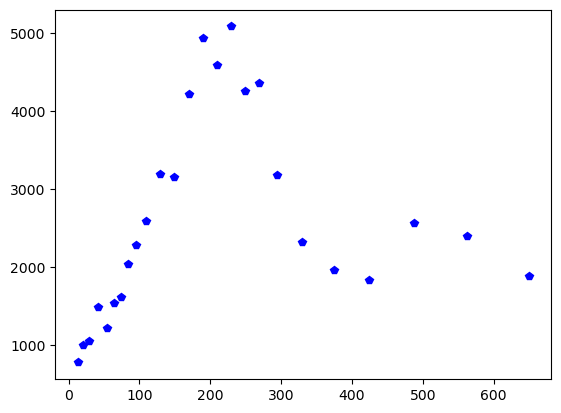

In [16]:
plt.plot(vppf,ter_col,'pb')

In [17]:
def calcular_coeficientes(x, y, err, grad):
    n = grad
    A = np.zeros((n, n))
    b = np.zeros(n)

    for i in range(n):
        for j in range(n):
            A[i, j] = 2*np.sum((x**(i+j))/err)

        # Corrección de error de sintaxis
        b[i] = 2 * np.sum((y * x**i)/err)

    coef = np.linalg.solve(A, b)
    return coef

In [41]:
x_1 = vppf.to_numpy()
y_1 = ter_col.to_numpy()
err_1 = err.to_numpy()
coef = calcular_coeficientes(x_1,y_1,err_1, 11)

In [42]:
coef

array([ 6.85180170e+02,  5.45981156e+00,  6.28535692e-01, -1.68714791e-02,
        2.15766051e-04, -1.42410511e-06,  5.28282112e-09, -1.15334917e-11,
        1.47563665e-14, -1.02611649e-17,  2.99978556e-21])

In [43]:
def evaluar_polinomio(coeficientes, x):
    y = np.zeros_like(x)
    for i in range(len(coeficientes)):
        y += coeficientes[i] * (x ** i)
    return y

In [44]:
x_2 = np.linspace(0,600,1000)
interpolacion = evaluar_polinomio(coef,x_2)

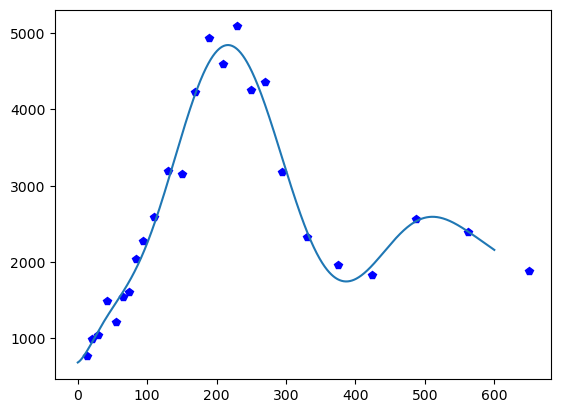

In [45]:
plt.plot(vppf,ter_col,'pb')
plt.plot(x_2,interpolacion)